<a href="https://colab.research.google.com/github/EdivaldoVictor/Projeto-Big-Data-Python/blob/main/AnaliseElei%C3%A7%C3%B5es2006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Big Data com Python - Eleições Presidenciais do Brasil (2006)**

**Importando as Bibliotecas Necessárias para o Projeto**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Criando nosso DataFrame a partir da planilha**

In [3]:
df = pd.read_csv('drive/MyDrive/PlanilhaEleições/votacao_secao_2006_BR.csv', encoding='latin1', sep=';')

**Analisando se há colunas sem valores "Nulas"**

In [4]:
df.info
df.isnull().sum()

,0
DT_GERACAO,0
HH_GERACAO,0
ANO_ELEICAO,0
CD_TIPO_ELEICAO,0
NM_TIPO_ELEICAO,0
NR_TURNO,0
CD_ELEICAO,0
DS_ELEICAO,0
DT_ELEICAO,0
TP_ABRANGENCIA,0


**Criando uma Variável com os Nomes dos Candidatos**

In [5]:
candidatos = list(df.NM_VOTAVEL.unique())
candidatos

['ANA MARIA TEIXEIRA RANGEL',
 'CRISTOVAM RICARDO CALVACANTI BUARQUE',
 'GERALDO JOSÉ RODRIGUES ALCKMIN FILHO',
 'HELOÍSA HELENA LIMA DE MORAES CARVALHO',
 'LUIZ INACIO LULA DA SILVA',
 'VOTO BRANCO',
 'VOTO NULO',
 'JOSÉ MARIA EYMAEL',
 'LUCIANO CALDAS BIVAR',
 'RUI COSTA PIMENTA']

**Juntando as Cidades de Estados na Coluna Cidade**

In [6]:
def mescla_cidade_e_estado(n):
    return n.NM_MUNICIPIO + "-" + n.SG_UF

df.NM_MUNICIPIO = df.apply(mescla_cidade_e_estado, axis=1)

**Quantidade de Municípios Eleitorais**

In [7]:
len(df.NM_MUNICIPIO.unique())

5642

**Separando nosso dataframe por Turno 1 e Turno 2**

In [8]:
#separando os dataframes de primeiro e segundo turno
df_turno1 = df[df.NR_TURNO == 1]
df_turno2 = df[df.NR_TURNO == 2]


#**Votos Por Candidato no Primeiro Turno**

In [9]:
# Agrupa os votos por candidato e soma a quantidade de votos
votos_por_candidato = df_turno1.groupby('NM_VOTAVEL')['QT_VOTOS'].sum()

# Removendo os votos nulos e brancos
votos_por_candidato = votos_por_candidato.drop(index=['VOTO NULO', 'VOTO BRANCO'], errors='ignore')

# Ordenando os em ordem decrescente
votos_por_candidato = votos_por_candidato.sort_values(ascending=False)

# Aqui calculamos a porcentagem de votos por candidato
total_votos = votos_por_candidato.sum()
porcentagens = (votos_por_candidato / total_votos) * 100




**Tabela**

In [10]:
tabela_votos = pd.DataFrame({
    'Candidato': votos_por_candidato.index,
    'Votos': votos_por_candidato.values,
    'Porcentagem': [f"{p:.2f}%" for p in porcentagens.values]
})

tabela_votos

,Candidato,Votos,Porcentagem
0,LUIZ INACIO LULA DA SILVA,46662365,48.60%
1,GERALDO JOSÉ RODRIGUES ALCKMIN FILHO,39968369,41.62%
2,HELOÍSA HELENA LIMA DE MORAES CARVALHO,6575393,6.85%
3,CRISTOVAM RICARDO CALVACANTI BUARQUE,2538844,2.64%
4,ANA MARIA TEIXEIRA RANGEL,126404,0.13%
5,JOSÉ MARIA EYMAEL,63294,0.07%
6,LUCIANO CALDAS BIVAR,62064,0.06%
7,RUI COSTA PIMENTA,25769,0.03%


**Gráfico**

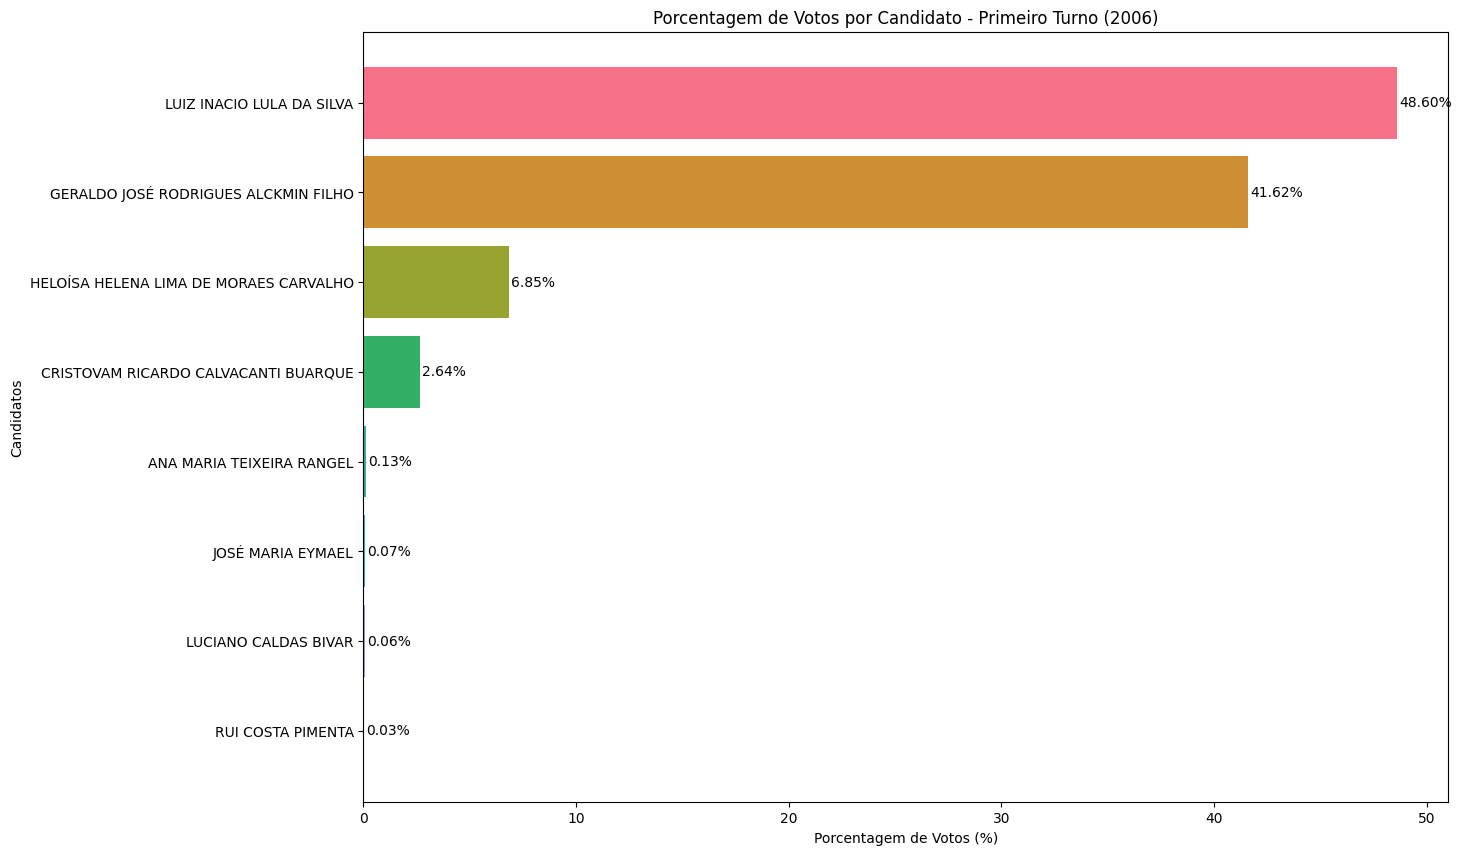

In [53]:
plt.figure(figsize=(14, 10))
cores = sns.color_palette("husl", len(votos_por_candidato))

plt.barh(votos_por_candidato.index, porcentagens, color=cores)
plt.xlabel("Porcentagem de Votos (%)")
plt.ylabel("Candidatos")
plt.title("Porcentagem de Votos por Candidato - Primeiro Turno (2006)")

for i, v in enumerate(porcentagens):
    plt.text(v + 0.1, i, f'{v:.2f}%', va='center')

plt.gca().invert_yaxis()
plt.show()

#**Os 4 Candidatos Mais Votados no Primeiro Turno**

In [12]:
top4_candidatos = votos_por_candidato.head(4)
top4_porcentagens = porcentagens.head(4)



**Tabela**

In [52]:
top4_df = pd.DataFrame({
    'Candidato': top4_candidatos.index,
    'Votos': top4_candidatos.values,
    'Porcentagem': [f"{p:.2f}%" for p in top4_porcentagens.values]
})
print("Tabela dos 4 Mais Votados - Primeiro Turno (2006)")
top4_df

Tabela dos 4 Mais Votados - Primeiro Turno (2006)


,Candidato,Votos,Porcentagem
0,LUIZ INACIO LULA DA SILVA,46662365,48.60%
1,GERALDO JOSÉ RODRIGUES ALCKMIN FILHO,39968369,41.62%
2,HELOÍSA HELENA LIMA DE MORAES CARVALHO,6575393,6.85%
3,CRISTOVAM RICARDO CALVACANTI BUARQUE,2538844,2.64%


**Gráfico**

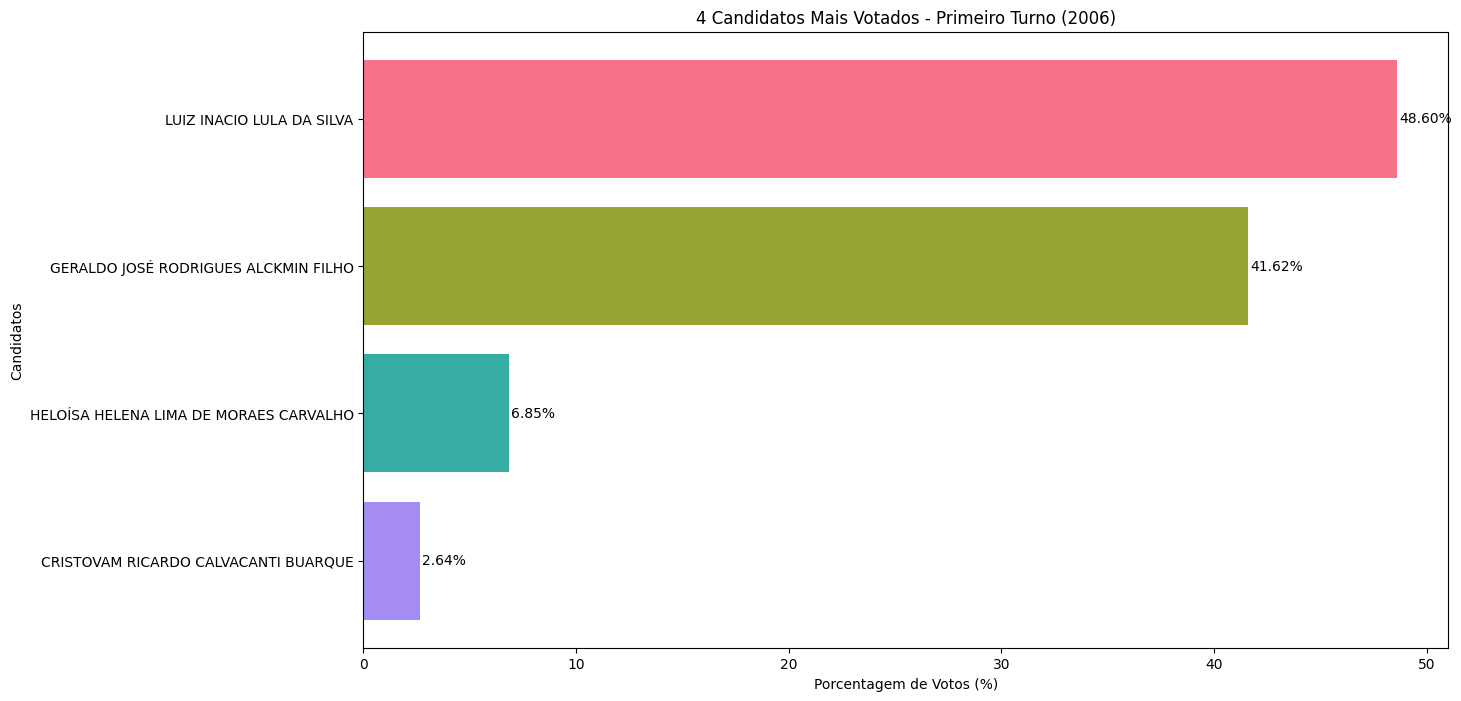

In [51]:
plt.figure(figsize=(14, 8))
cores = sns.color_palette("husl", len(top4_candidatos))

plt.barh(top4_candidatos.index, top4_porcentagens, color=cores)
plt.xlabel("Porcentagem de Votos (%)")
plt.ylabel("Candidatos")
plt.title("4 Candidatos Mais Votados - Primeiro Turno (2006)")

for i, v in enumerate(top4_porcentagens):
    plt.text(v + 0.1, i, f'{v:.2f}%', va='center')

plt.gca().invert_yaxis()
plt.show()

#**Votos Brancos e Nulos no Primeiro Turno**

In [15]:
votos_nulos = df_turno1[df_turno1['NM_VOTAVEL'] == 'VOTO NULO']['QT_VOTOS'].sum()
votos_brancos = df_turno1[df_turno1['NM_VOTAVEL'] == 'VOTO BRANCO']['QT_VOTOS'].sum()

total_nulos_brancos = votos_nulos + votos_brancos
total_votos_validos = df_turno1['QT_VOTOS'].sum() - total_nulos_brancos



**Tabela**

In [50]:
percent_nulos = (votos_nulos / df_turno1['QT_VOTOS'].sum()) * 100
percent_brancos = (votos_brancos / df_turno1['QT_VOTOS'].sum()) * 100
data = {'Tipo de Voto': ['Brancos', 'Nulos', 'Total'],
        'Quantidade': [votos_brancos, votos_nulos, total_nulos_brancos],
        'Porcentagem': [f'{percent_brancos:.2f}%', f'{percent_nulos:.2f}%', f'{(percent_brancos + percent_nulos):.2f}%']}

tabela_nulos_brancos = pd.DataFrame(data)

print("Tabela de Votos Brancos e Nulos - Primeiro Turno (2006)")
tabela_nulos_brancos

Tabela de Votos Brancos e Nulos - Primeiro Turno (2006)


,Tipo de Voto,Quantidade,Porcentagem
0,Brancos,2866205,2.73%
1,Nulos,5931752,5.66%
2,Total,8797957,8.39%


**Gráfico**

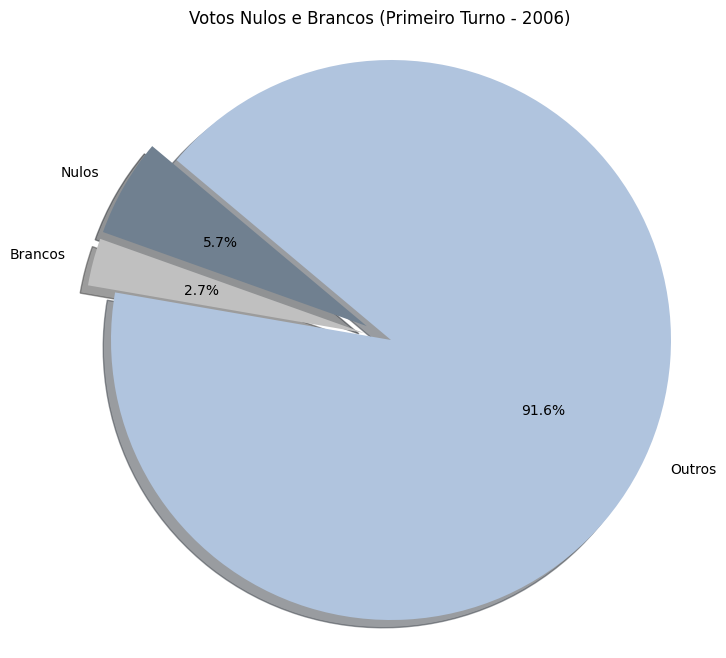

In [49]:
labels = ['Nulos', 'Brancos', 'Outros']
sizes = [votos_nulos, votos_brancos, total_votos_validos]
colors = ['slategray', 'silver', 'lightsteelblue']
explode = (0.1, 0.1, 0)
plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Votos Nulos e Brancos (Primeiro Turno - 2006)')
plt.show()

#**Votos por Candidato no Segundo Turno**

In [18]:
# Agrupando os votos por candidato e somando a quantidade de votos para o segundo turno
votos_por_candidato_t2 = df_turno2.groupby('NM_VOTAVEL')['QT_VOTOS'].sum()
votos_por_candidato_t2 = votos_por_candidato_t2.drop(index=['VOTO NULO', 'VOTO BRANCO'], errors='ignore')

votos_por_candidato_t2 = votos_por_candidato_t2.sort_values(ascending=False)
total_votos_t2 = votos_por_candidato_t2.sum()
porcentagens_t2 = (votos_por_candidato_t2 / total_votos_t2) * 100


**Tabela**

In [48]:
tabela_votos_t2 = pd.DataFrame({
    'Candidato': votos_por_candidato_t2.index,
    'Votos': votos_por_candidato_t2.values,
    'Porcentagem': [f"{p:.2f}%" for p in porcentagens_t2.values]
})
print("Tabela de Votos - Segundo Turno (2006)")
tabela_votos_t2

Tabela de Votos - Segundo Turno (2006)


,Candidato,Votos,Porcentagem
0,LUIZ INACIO LULA DA SILVA,58295042,60.83%
1,GERALDO JOSÉ RODRIGUES ALCKMIN FILHO,37543178,39.17%


**Gráfico**

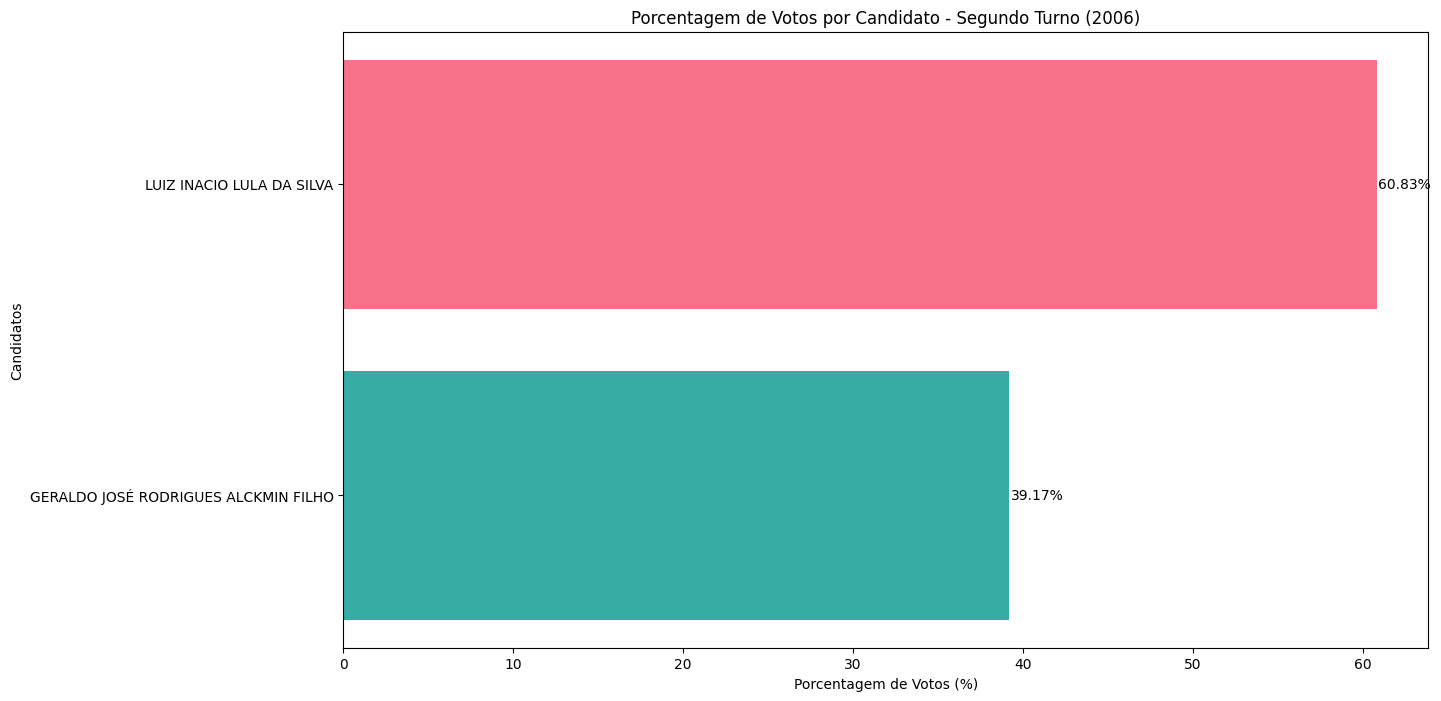

In [47]:
plt.figure(figsize=(14, 8))
cores = sns.color_palette("husl", len(votos_por_candidato_t2))

plt.barh(votos_por_candidato_t2.index, porcentagens_t2, color=cores)
plt.xlabel("Porcentagem de Votos (%)")
plt.ylabel("Candidatos")
plt.title("Porcentagem de Votos por Candidato - Segundo Turno (2006)")
for i, v in enumerate(porcentagens_t2):
    plt.text(v + 0.1, i, f'{v:.2f}%', va='center')

plt.gca().invert_yaxis()
plt.show()

#**Votos Brancos e Nulos Segundo turno**

In [21]:
votos_nulos2 = df_turno2[df_turno2['NM_VOTAVEL'] == 'VOTO NULO']['QT_VOTOS'].sum()
votos_brancos2 = df_turno2[df_turno2['NM_VOTAVEL'] == 'VOTO BRANCO']['QT_VOTOS'].sum()

total_nulos_brancos2 = votos_nulos2 + votos_brancos2
total_votos_validos2 = df_turno2['QT_VOTOS'].sum() - total_nulos_brancos2


**Tabela**

In [46]:
percent_nulos2 = (votos_nulos / df_turno2['QT_VOTOS'].sum()) * 100
percent_brancos2 = (votos_brancos / df_turno2['QT_VOTOS'].sum()) * 100

data2 = {'Tipo de Voto': ['Brancos', 'Nulos', 'Total'],
        'Quantidade': [votos_brancos2, votos_nulos2, total_nulos_brancos2],
        'Porcentagem': [f'{percent_brancos2:.2f}%', f'{percent_nulos2:.2f}%', f'{(percent_brancos2 + percent_nulos2):.2f}%']}

tabela_nulos_brancos2 = pd.DataFrame(data2)

print("Tabela de Votos Brancos e Nulos - Segundo Turno (2006)")
tabela_nulos_brancos2

Tabela de Votos Brancos e Nulos - Segundo Turno (2006)


,Tipo de Voto,Quantidade,Porcentagem
0,Brancos,1351448,2.81%
1,Nulos,4808553,5.82%
2,Total,6160001,8.63%


**Gráfico**

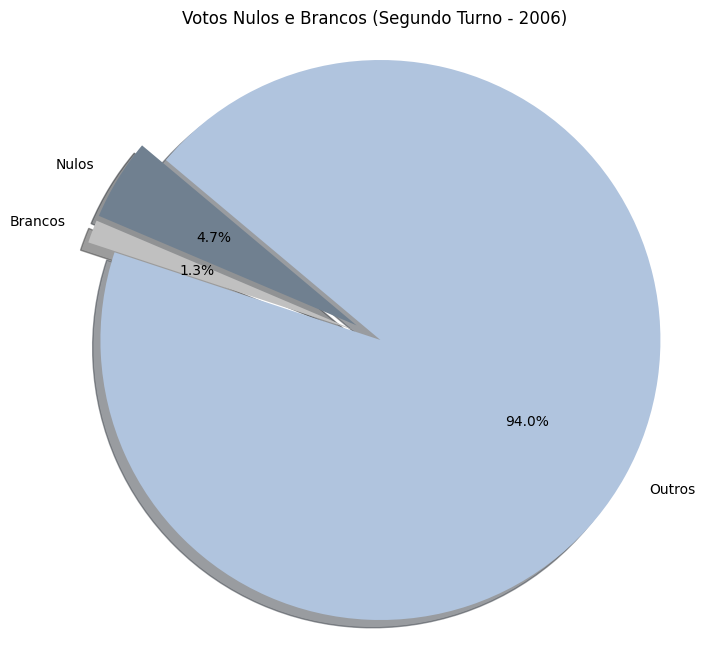

In [45]:
labels = ['Nulos', 'Brancos', 'Outros']
sizes = [votos_nulos2, votos_brancos2, total_votos_validos2]
colors = ['slategray', 'silver', 'lightsteelblue']
explode = (0.1, 0.1, 0)

plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Votos Nulos e Brancos (Segundo Turno - 2006)')
plt.show()

#**Votos Por Estado no Primeiro Turno**

In [24]:
votos_por_estado = df_turno1.groupby('SG_UF')['QT_VOTOS'].sum()
votos_por_estado = votos_por_estado.sort_values(ascending=False)


**Tabela**

In [25]:
votos_por_estado_df = pd.DataFrame({'UF': votos_por_estado.index, 'Total de Votos': votos_por_estado.values})
votos_por_estado_df

,UF,Total de Votos
0,SP,23771898
1,MG,11232597
2,RJ,9255690
3,BA,7225104
4,RS,6676828
5,PR,5967396
6,PE,4769970
7,CE,4429568
8,SC,3588173
9,PA,3333677


**Gráfico**

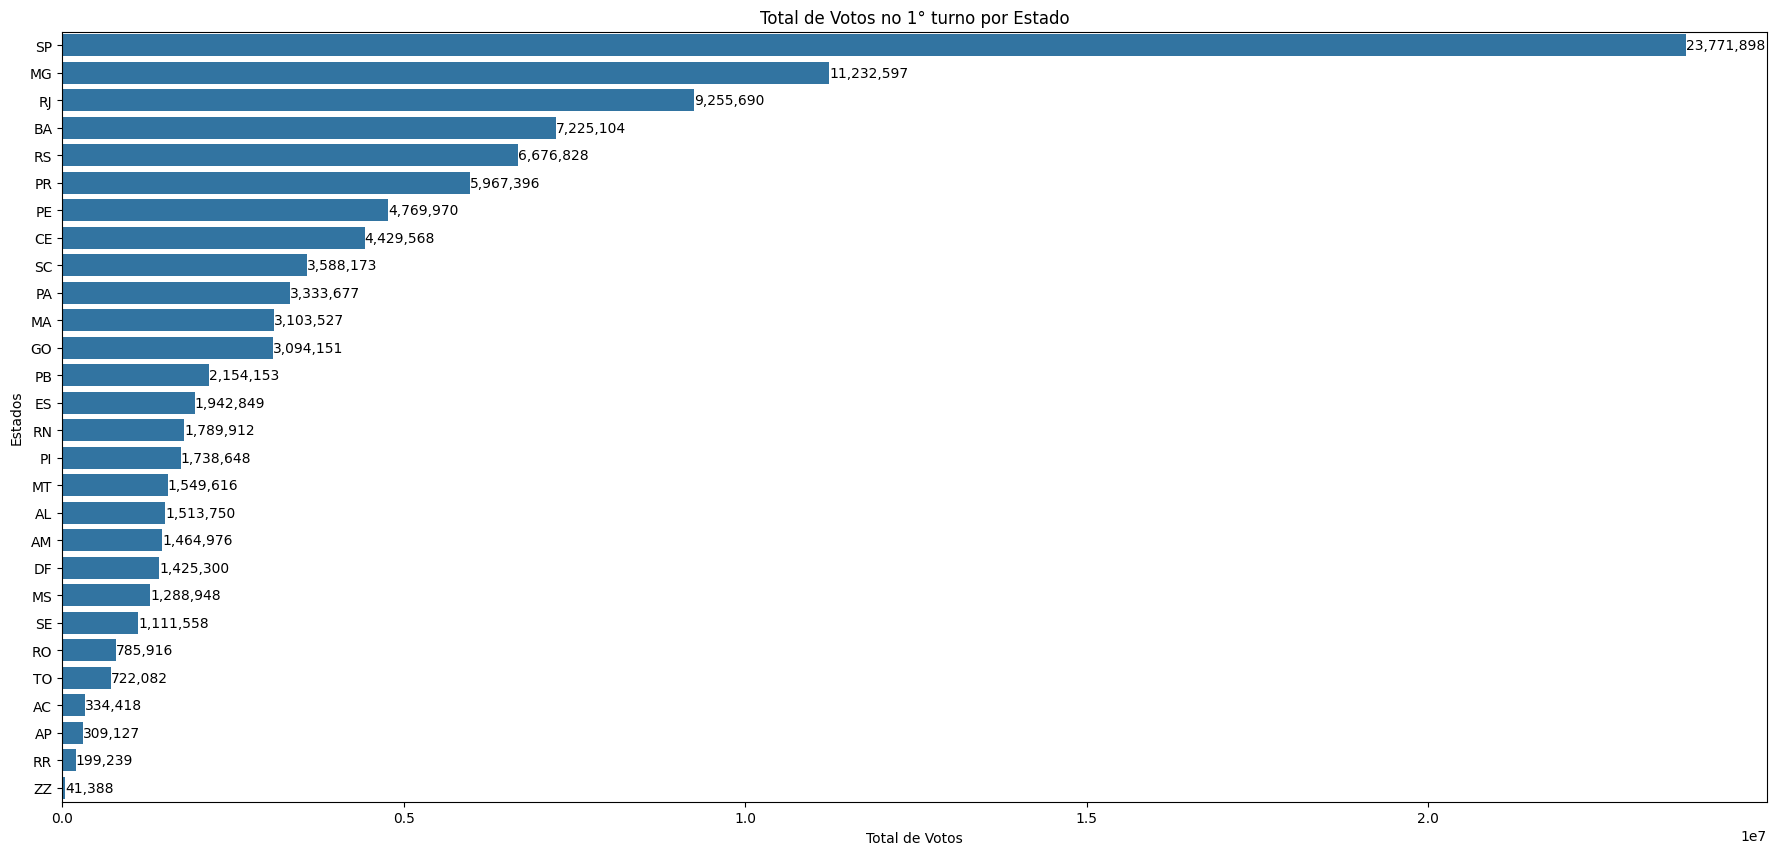

In [26]:

plt.figure(figsize=(22, 10))
sns.barplot(x=votos_por_estado.values, y=votos_por_estado.index, orient='h')
plt.xlabel('Total de Votos')
plt.ylabel('Estados')
plt.title('Total de Votos no 1° turno por Estado')


for i, v in enumerate(votos_por_estado.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()



#**Votos Por Estado no Segundo Turno**

In [27]:
votos_por_estado_t2 = df_turno2.groupby('SG_UF')['QT_VOTOS'].sum()
votos_por_estado_t2 = votos_por_estado_t2.sort_values(ascending=False)

**Tabela**

In [28]:
votos_por_estado_t2_df = pd.DataFrame({'UF': votos_por_estado_t2.index, 'Total de Votos': votos_por_estado_t2.values})
votos_por_estado_t2_df

,UF,Total de Votos
0,SP,23458590
1,MG,10996098
2,RJ,9001916
3,BA,6987561
4,RS,6553582
5,PR,5870596
6,PE,4671124
7,CE,4285077
8,SC,3533276
9,PA,3154056


**Gráfico**

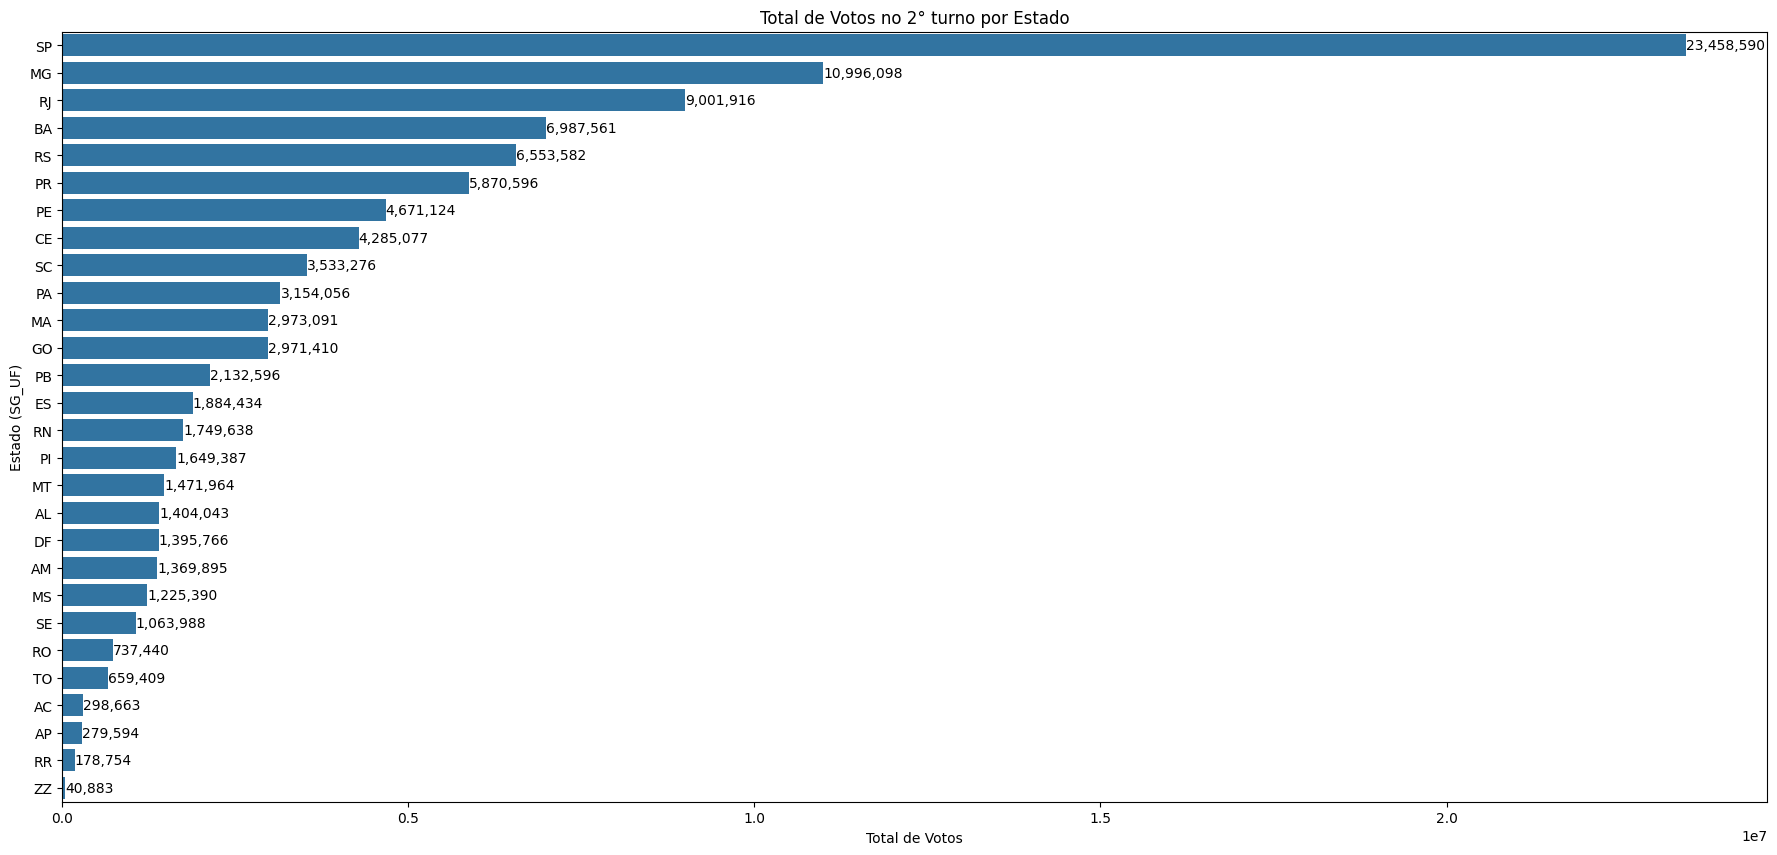

In [29]:
plt.figure(figsize=(22, 10))
sns.barplot(x=votos_por_estado_t2.values, y=votos_por_estado_t2.index, orient='h')
plt.xlabel('Total de Votos')
plt.ylabel('Estado (SG_UF)')
plt.title('Total de Votos no 2° turno por Estado')
for i, v in enumerate(votos_por_estado_t2.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Votos Nulos Por Estado Primeiro Turno**

In [30]:
votos_nulos_por_estado = df_turno1[df_turno1['NM_VOTAVEL'] == 'VOTO NULO'].groupby('SG_UF')['QT_VOTOS'].sum()
votos_nulos_por_estado = votos_nulos_por_estado.sort_values(ascending=False)

**Tabela**

In [42]:
votos_nulos_df = pd.DataFrame({'UF': votos_nulos_por_estado.index, 'Votos Nulos': votos_nulos_por_estado.values})

print("Tabela de Votos Nulos- Segundo Turno (2006)")
votos_nulos_df

Tabela de Votos Nulos- Segundo Turno (2006)


,UF,Votos Nulos
0,SP,1048712
1,RJ,636682
2,MG,622953
3,BA,581489
4,PE,370461
5,CE,329566
6,RS,252527
7,PR,249181
8,MA,229422
9,GO,180348


**Gráfico**

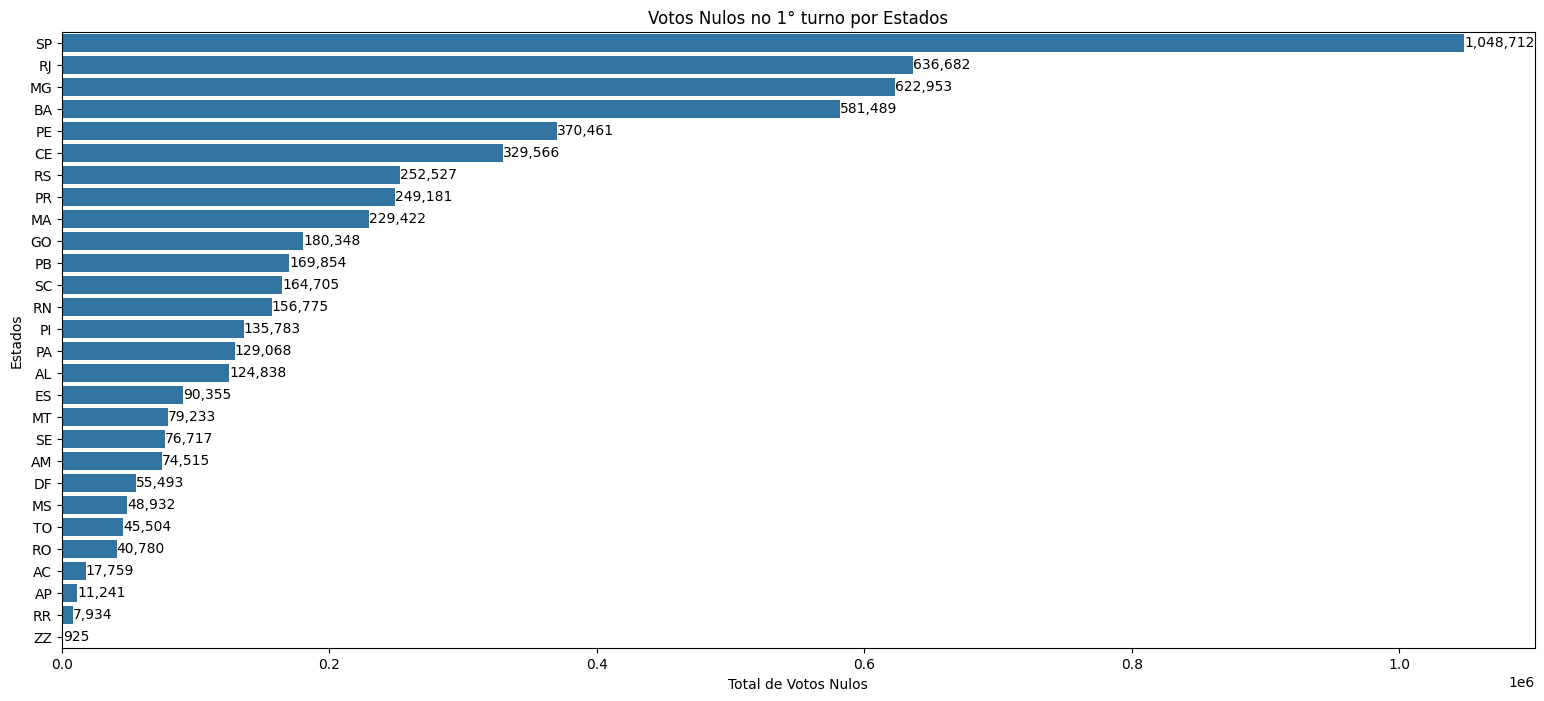

In [32]:
plt.figure(figsize=(19, 8))
sns.barplot(x=votos_nulos_por_estado.values, y=votos_nulos_por_estado.index, orient='h')
plt.xlabel('Total de Votos Nulos')
plt.ylabel('Estados')
plt.title('Votos Nulos no 1° turno por Estados')
for i, v in enumerate(votos_nulos_por_estado.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Votos Nulos Por Estado Segundo Turno**

In [33]:
votos_nulos_por_estado2 = df_turno2[df_turno2['NM_VOTAVEL'] == 'VOTO NULO'].groupby('SG_UF')['QT_VOTOS'].sum()
votos_nulos_por_estado2 = votos_nulos_por_estado2.sort_values(ascending=False)

**Tabela**

In [34]:
votos_nulos_df2 = pd.DataFrame({'UF': votos_nulos_por_estado2.index, 'Votos Nulos': votos_nulos_por_estado2.values})

votos_nulos_df2

,UF,Votos Nulos
0,RJ,871469
1,SP,773627
2,PE,430108
3,MG,395621
4,PR,382809
5,BA,267177
6,MA,253945
7,SC,226010
8,GO,223023
9,RN,147476


**Gráfico**

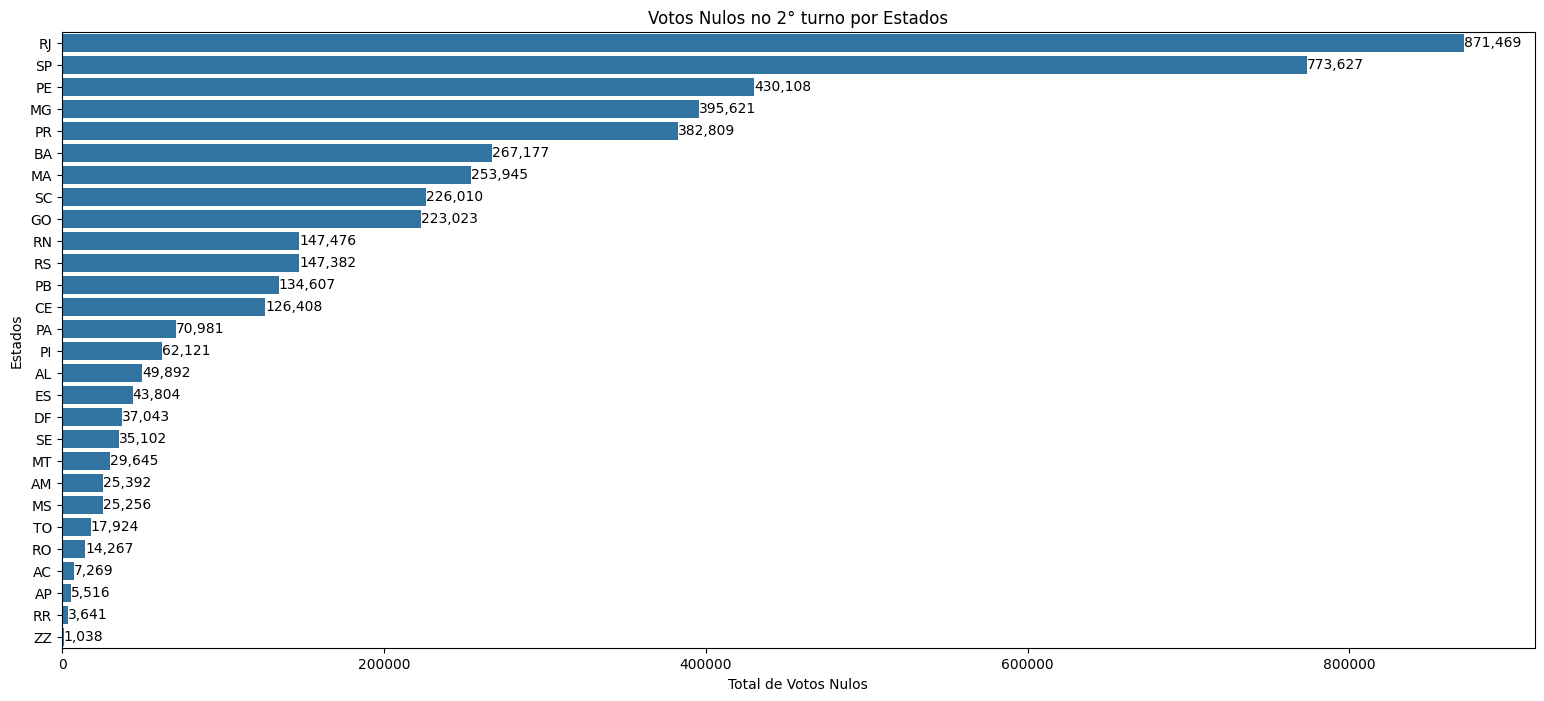

In [35]:
plt.figure(figsize=(19, 8))
sns.barplot(x=votos_nulos_por_estado2.values, y=votos_nulos_por_estado2.index, orient='h')
plt.xlabel('Total de Votos Nulos')
plt.ylabel('Estados')
plt.title('Votos Nulos no 2° turno por Estados')

for i, v in enumerate(votos_nulos_por_estado2.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Votos Brancos por Estado no Primeiro Turno**

In [36]:
votos_brancos_por_estado = df_turno1[df_turno1['NM_VOTAVEL'] == 'VOTO BRANCO'].groupby('SG_UF')['QT_VOTOS'].sum()

votos_brancos_por_estado = votos_brancos_por_estado.sort_values(ascending=False)



**Tabela**

In [43]:
votos_brancos_df = pd.DataFrame({'UF': votos_brancos_por_estado.index, 'Votos Brancos': votos_brancos_por_estado.values})
print("Tabela de Votos Brancos por Estado - Primeiro Turno (2006)")
votos_brancos_df

Tabela de Votos Brancos por Estado - Primeiro Turno (2006)


,UF,Votos Brancos
0,SP,709170
1,MG,384798
2,RJ,292369
3,RS,214245
4,BA,201151
5,PE,178589
6,PR,145476
7,CE,93891
8,SC,85003
9,GO,67409


**Gráfico**

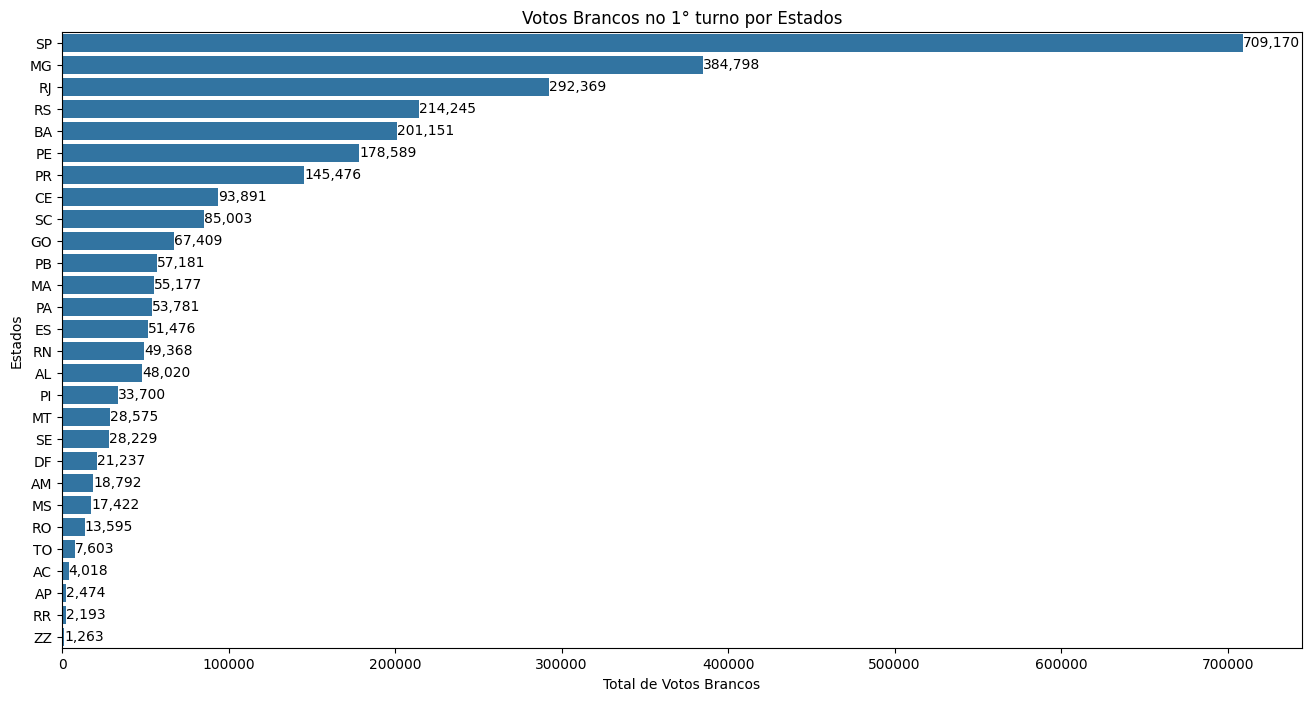

In [38]:
plt.figure(figsize=(16, 8))
sns.barplot(x=votos_brancos_por_estado.values, y=votos_brancos_por_estado.index, orient='h')
plt.xlabel('Total de Votos Brancos')
plt.ylabel('Estados')
plt.title('Votos Brancos no 1° turno por Estados')

for i, v in enumerate(votos_brancos_por_estado.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Votos Brancos por Estado no Segundo Turno**

In [39]:
votos_brancos_por_estado2 = df_turno2[df_turno2['NM_VOTAVEL'] == 'VOTO BRANCO'].groupby('SG_UF')['QT_VOTOS'].sum()

votos_brancos_por_estado2 = votos_brancos_por_estado2.sort_values(ascending=False)


**Tabela**

In [44]:
votos_brancos_df2 = pd.DataFrame({'UF': votos_brancos_por_estado2.index, 'Votos Brancos': votos_brancos_por_estado2.values})
print("Tabela de Votos Brancos por Estado - Segundo Turno (2006)")
votos_brancos_df2

Tabela de Votos Brancos por Estado - Segundo Turno (2006)


,UF,Votos Brancos
0,SP,303249
1,RJ,191676
2,MG,156832
3,RS,108626
4,PE,85958
5,PR,79667
6,BA,75653
7,SC,49146
8,CE,38672
9,GO,37096


**Gráfico**

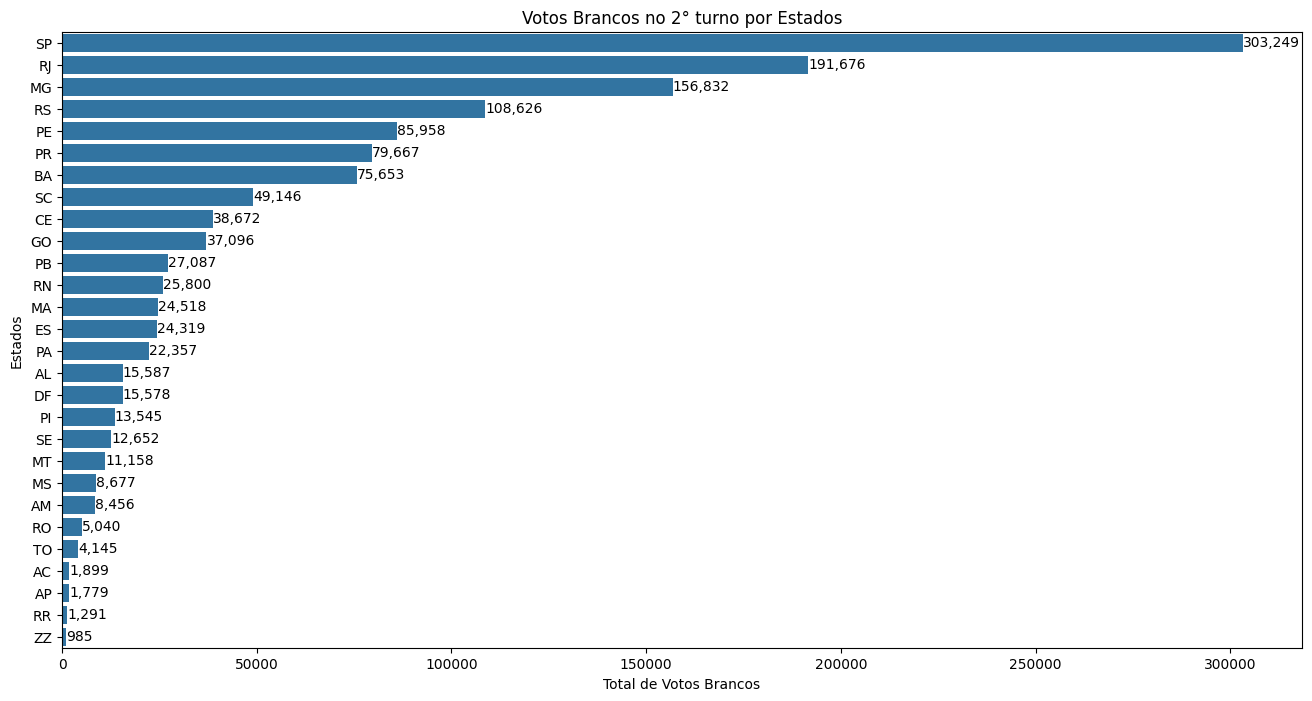

In [41]:
plt.figure(figsize=(16, 8))
sns.barplot(x=votos_brancos_por_estado2.values, y=votos_brancos_por_estado2.index, orient='h')
plt.xlabel('Total de Votos Brancos')
plt.ylabel('Estados')
plt.title('Votos Brancos no 2° turno por Estados')

for i, v in enumerate(votos_brancos_por_estado2.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()